In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/titanic.csv


In [2]:
df=pd.read_csv("/kaggle/input/titanic/titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.set_index('PassengerId',inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [5]:
df.interpolate(inplace=True)
df_encoded = pd.get_dummies(df['Sex'], prefix='Category').astype(int)
df=pd.concat([df,df_encoded],axis=1)

In [6]:
#df['Cabin_encoded'] = pd.factorize(df['Cabin'])[0] + 1
#df

In [7]:
df_encoded=pd.get_dummies(df['Embarked'],prefix='encoded').astype(int)
df=pd.concat([df,df_encoded],axis=1)
df.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis=1,inplace=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Category_female,Category_male,encoded_C,encoded_Q,encoded_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,0,1,0,0,1
888,1,1,19.0,0,0,30.0000,1,0,0,0,1
889,0,3,22.5,1,2,23.4500,1,0,0,0,1


In [8]:
df.corr()['Survived']

Survived           1.000000
Pclass            -0.338481
Age               -0.062164
SibSp             -0.035322
Parch              0.081629
Fare               0.257307
Category_female    0.543351
Category_male     -0.543351
encoded_C          0.168240
encoded_Q          0.003650
encoded_S         -0.155660
Name: Survived, dtype: float64

In [9]:
def z_score_normalization(column):
    mean_value = column.mean()
    std_dev = column.std()
    normalized_column = (column - mean_value) / std_dev
    return normalized_column
X_initial = df.drop(columns=['Survived'])
y=df['Survived']
X = X_initial.apply(z_score_normalization)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
#df_normalized = df.apply(z_score_normalization)
X_train_array=X_train.to_numpy()
X_test_array=X_test.to_numpy()
y_train_array=y_train.to_numpy()
y_test_array=y_test.to_numpy()
X.shape

(891, 10)

In [10]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def fit(itr, X,y,lr):
    cost = []
    weights=np.zeros(X.shape[1])
    bias=0
    
    for i in range(itr):
        linear_pred=np.dot(X,weights)+bias
        predictions=sigmoid(linear_pred)
        dw=(1/X.shape[0])*np.dot(X.T,(predictions-y))
        db=(1/X.shape[0])*np.sum(predictions-y)
        cost.append(-1/X.shape[0] * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions)))
        weights=weights-lr*dw
        bias=bias-lr*db
    return weights,bias,cost
def predict(X,weights,bias):
    linear_pred=np.dot(X,weights)+bias
    y_pred=sigmoid(linear_pred)
    class_pred=[0 if y<=0.5 else 1 for y in y_pred]
    return class_pred
def accuracy(y_pred,y_test):
    return np.sum(y_pred==y_test)/len(y_test)

the accuracy is  80.44692737430168 %
the precision is  0.7297297297297297
the recall is  0.782608695652174


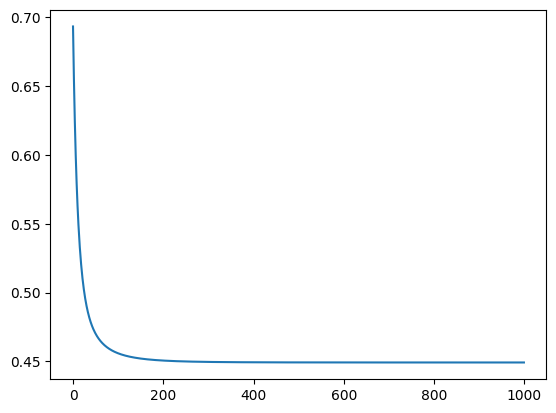

In [11]:
iterations=1000
learn=0.1
weights,bias,cost=fit(iterations,X_train_array,y_train_array,learn)
y_pred=predict(X_test_array,weights,bias)
acc=accuracy(y_pred,y_test_array)
precision=precision_score(y_pred,y_test)
recall=recall_score(y_pred,y_test)
print("the accuracy is ",acc*100,"%")
print("the precision is ",precision)
print("the recall is ",recall)
plt.plot(range(iterations), cost)